<a href="https://colab.research.google.com/github/tnwls6865/Creative_Masters/blob/main/week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creative Masters

## Neural Network (torch.nn)

신경망은 데이터에 대한 작업을 수행하는 계층/모듈로 구성됩니다. torch.nn는 Neural Network의 약자로 자체 신경망을 구축하는 데 필요한 모든 빌딩 블록을 제공합니다. PyTorch의 모든 모듈은 nn.Module의 하위 클래스입니다. 신경망은 다른 모듈(계층)로 구성된 모듈 자체입니다. 이 중첩 구조를 통해 복잡한 아키텍처를 쉽게 구축하고 관리할 수 있습니다.

In [1]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

가능한 경우 GPU와 같은 하드웨어 가속기에서 모델을 훈련하는 것이 좋습니다. torch.cuda를 사용할 수 있는지 확인하고 그렇지 않으면 CPU를 계속 사용하는 코드를 작성합니다.

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


### Neural Network 모델 제작

nn.Module을 하위 클래스로 분류하여 신경망을 정의하고 __init__에서 신경망 계층을 초기화합니다. 모든 nn.Module 하위 클래스는 전달 메서드의 입력 데이터에 대한 작업을 구현합니다.

In [3]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [4]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


모델을 사용하기 위해 입력 데이터를 전달합니다. 그러면 일부 백그라운드 작업과 함께 모델의 전달이 실행됩니다. model.forward()를 직접 호출하지 않으셔도 됩니다.

입력에서 모델을 호출하면 각 클래스에 대한 10개의 원시 예측 값의 각 출력에 해당하는 dim=0과 각 출력의 개별 값에 해당하는 dim=1인 2차원 텐서를 반환합니다. nn.Softmax 모듈의 인스턴스를 통과하여 예측 확률을 얻습니다.

In [5]:
X = torch.rand(1, 28, 28, device=device)
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

Predicted class: tensor([2], device='cuda:0')


### 자주 사용되는 함수 모음

3채널의 28x28 이미지가 있다고 가정해보겠습니다. 해당 이미지에 대해서 각각의 함수를 접목시켜보도록 하겠습니다.

In [6]:
input_image = torch.rand(3,28,28)
print(input_image.size())

torch.Size([3, 28, 28])


#### nn.Flatten

nn.Flatten 레이어는 각 2D 28x28 이미지를 연속적인 784 픽셀 값 배열로 변환합니다.

In [7]:
flatten = nn.Flatten()
flat_image = flatten(input_image)
print(flat_image.size())

torch.Size([3, 784])


#### nn.Linear

Linear레이어는 저장된 가중치와 편향을 사용하여 입력에 선형 변환을 적용하는 모듈입니다.

즉 들어오는 데이터에 선형 변환을 적용하는 레이어입니다: $y=xA^T+by=xA^T+b$

In [8]:
layer1 = nn.Linear(in_features=28*28, out_features=20)
hidden1 = layer1(flat_image)
print(hidden1.size())

torch.Size([3, 20])


#### nn.ReLU

Non-linear activation function은 모델의 입력과 출력 사이에 복잡한 매핑을 만드는 것이 목적입니다. 비선형성을 도입하기 위해 선형 변환 후에 적용되어 신경망이 다양한 현상을 학습하도록 돕습니다.

지금 실습에서는 선형 레이어 간에 nn.ReLU를 사용하지만 모델에 비선형성을 도입하기 위한 다양한 종류의 활성화함수가 있습니다.

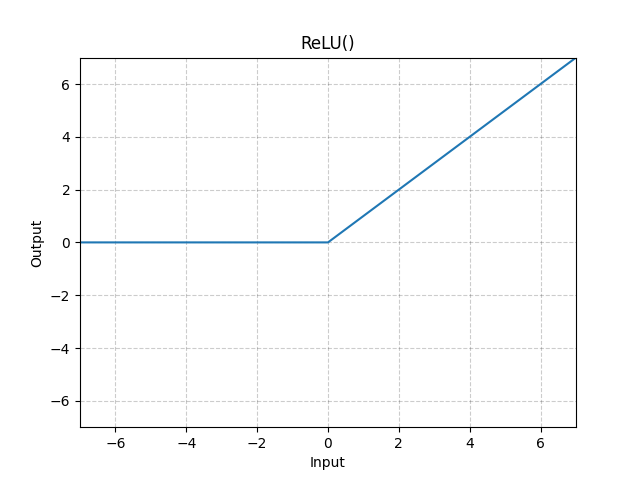

In [9]:
print(f"Before ReLU: {hidden1}\n\n")
hidden1 = nn.ReLU()(hidden1)
print(f"After ReLU: {hidden1}")

Before ReLU: tensor([[ 0.0576,  0.3696, -0.4464,  0.3068, -0.4565,  0.0736,  0.2438,  0.7823,
         -0.1168,  0.0688,  0.2283,  0.3512, -0.1028, -0.5441, -0.4722,  0.2475,
         -0.3430, -0.8088,  0.2043, -0.1063],
        [ 0.0428,  0.3691, -0.1011,  0.2575, -0.0895, -0.0555,  0.0056,  0.7404,
         -0.0172,  0.2509,  0.6322,  0.4503, -0.0578, -0.4501, -0.3978,  0.4687,
         -0.2718, -0.5109,  0.0174, -0.1335],
        [ 0.3820,  0.5374, -0.0125,  0.3501, -0.2768,  0.1328, -0.3705,  0.8684,
         -0.1985, -0.2193,  0.4206,  0.3262, -0.0382, -0.4989, -0.2332, -0.0038,
         -0.3040, -0.4721,  0.3415, -0.0810]], grad_fn=<AddmmBackward0>)


After ReLU: tensor([[0.0576, 0.3696, 0.0000, 0.3068, 0.0000, 0.0736, 0.2438, 0.7823, 0.0000,
         0.0688, 0.2283, 0.3512, 0.0000, 0.0000, 0.0000, 0.2475, 0.0000, 0.0000,
         0.2043, 0.0000],
        [0.0428, 0.3691, 0.0000, 0.2575, 0.0000, 0.0000, 0.0056, 0.7404, 0.0000,
         0.2509, 0.6322, 0.4503, 0.0000, 0.0000, 0.00

#### nn.Sequential

nn.Sequential은 순서가 지정된 모듈 컨테이너입니다. 데이터는 정의된 것과 동일한 순서로 모든 모듈을 통해 전달됩니다. 순차 컨테이너를 사용하여 seq_modules와 같은 빠른 네트워크를 구성할 수 있습니다.

In [11]:
seq_modules = nn.Sequential(
    flatten,
    layer1,
    nn.ReLU(),
    nn.Linear(20, 10)
)
input_image = torch.rand(3,28,28)
logits = seq_modules(input_image)
print(logits.size())

torch.Size([3, 10])


#### nn.Softmax

신경망의 마지막 linear 레이어는 nn.Softmax 모듈로 전달되는 $[-∞,+∞]$의 원시 값인 로짓을 반환합니다. 로짓은 각 클래스에 대한 모델의 예측 확률을 나타내는 값 [0, 1]로 조정됩니다. dim 매개변수는 값의 합이 1이 되어야 하는 차원을 나타냅니다.

In [13]:
softmax = nn.Softmax(dim=1)
pred_probab = softmax(logits)
print(pred_probab)

tensor([[0.1250, 0.1321, 0.0830, 0.1319, 0.0786, 0.0884, 0.0803, 0.1185, 0.0737,
         0.0885],
        [0.1225, 0.1260, 0.0929, 0.1144, 0.0939, 0.0883, 0.0810, 0.1069, 0.0711,
         0.1030],
        [0.1295, 0.1260, 0.0927, 0.1144, 0.0932, 0.0835, 0.0801, 0.1064, 0.0758,
         0.0983]], grad_fn=<SoftmaxBackward0>)


## 이미지 다운로드 및 열기

실습에 사용할 이미지를 다운로드 받겠습니다.

### os 모듈

os library는 python에서 자체적으로 제공하는 라이브러리입니다. os 모듈은 Operating System의 약자로서 운영체제에서 제공되는 여러 기능을 파이썬에서 수행할 수 있게 해줍니다. 

프로그래밍을 하다보면, 프로그래밍 동작에 필요한 설정 파일과 폴더를 만들어 동작시켜야 할 때가 있습니다. 예를 들어, 파일을 복사하거나 디렉터리를 생성하고 특정 디렉터리 내의 파일 목록을 본다던가 하는 작업을 필요로 할 때가 있습니다.

일반적으로는 이러한 작업은 윈도우에서 제공하는 CMD(Command)창의 명령어를 사용하거나, 바탕화면에서 오른쪽 클릭을 하는 등 그래픽 환경에서 작업을 하는게 일반적이지만, 이를 python 내부에서 하고싶을 때가 있을수도 있습니다.

이 때 os라이브러리의 함수를 사용하면 됩니다.

### PIL 모듈

PIL library는 이미지 분석 및 처리를 쉽게할 수 있도록 도와주는 라이브러리입니다. Python Imaging Library의 약자입니다. 

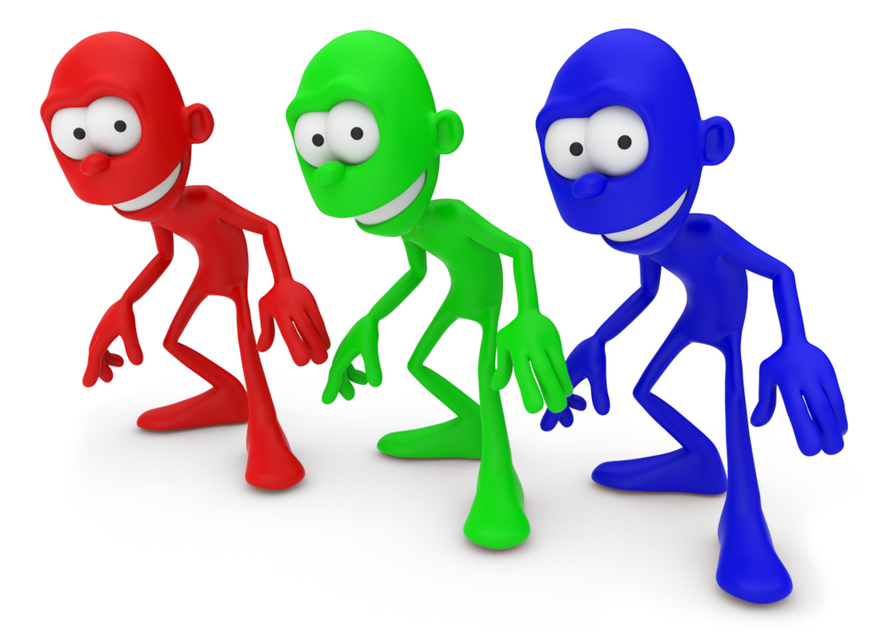

In [ ]:
import os
from PIL import Image

# 다운받을 이미지 url
url = "https://help.autodesk.com/cloudhelp/ENU/AR-Cinema4D/images/c4dtoa-user_data_rgb-pepe.png"

# curl 요청
os.system("curl " + url + " > test.png")

# 저장 된 이미지 확인
img = Image.open("test.png")
img

실습에 사용할 라이브러리들을 import해줍니다.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

아까 다운로드 받아두었던 이미지 파일을 open하도록 하겠습니다. 아시다시피 모든 이미지는 다 행렬입니다. 이제 저희는 수학적인 처리를 할 것이기 때문에 이미지를 행렬로 변환하도록 하겠습니다.

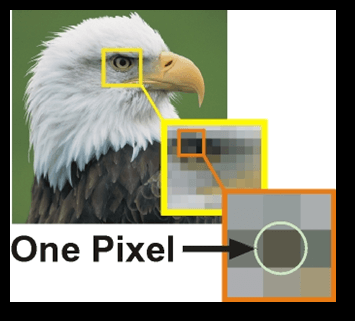

In [ ]:
image_test = Image.open("test.png")
image_np = np.array(image_test)

# Checking the type of the array
print(type(image_np))  # <class 'numpy.ndarray'>
# Checking the shape of the array
print(image_np.shape)  # (633, 880, 3)

<class 'numpy.ndarray'>
(633, 880, 3)


이미지는 RGB 3채널로 이루어져 있습니다. Red, Green, Blue 3가지 색상 값이 합해져서 이미지를 구성하게 됩니다.

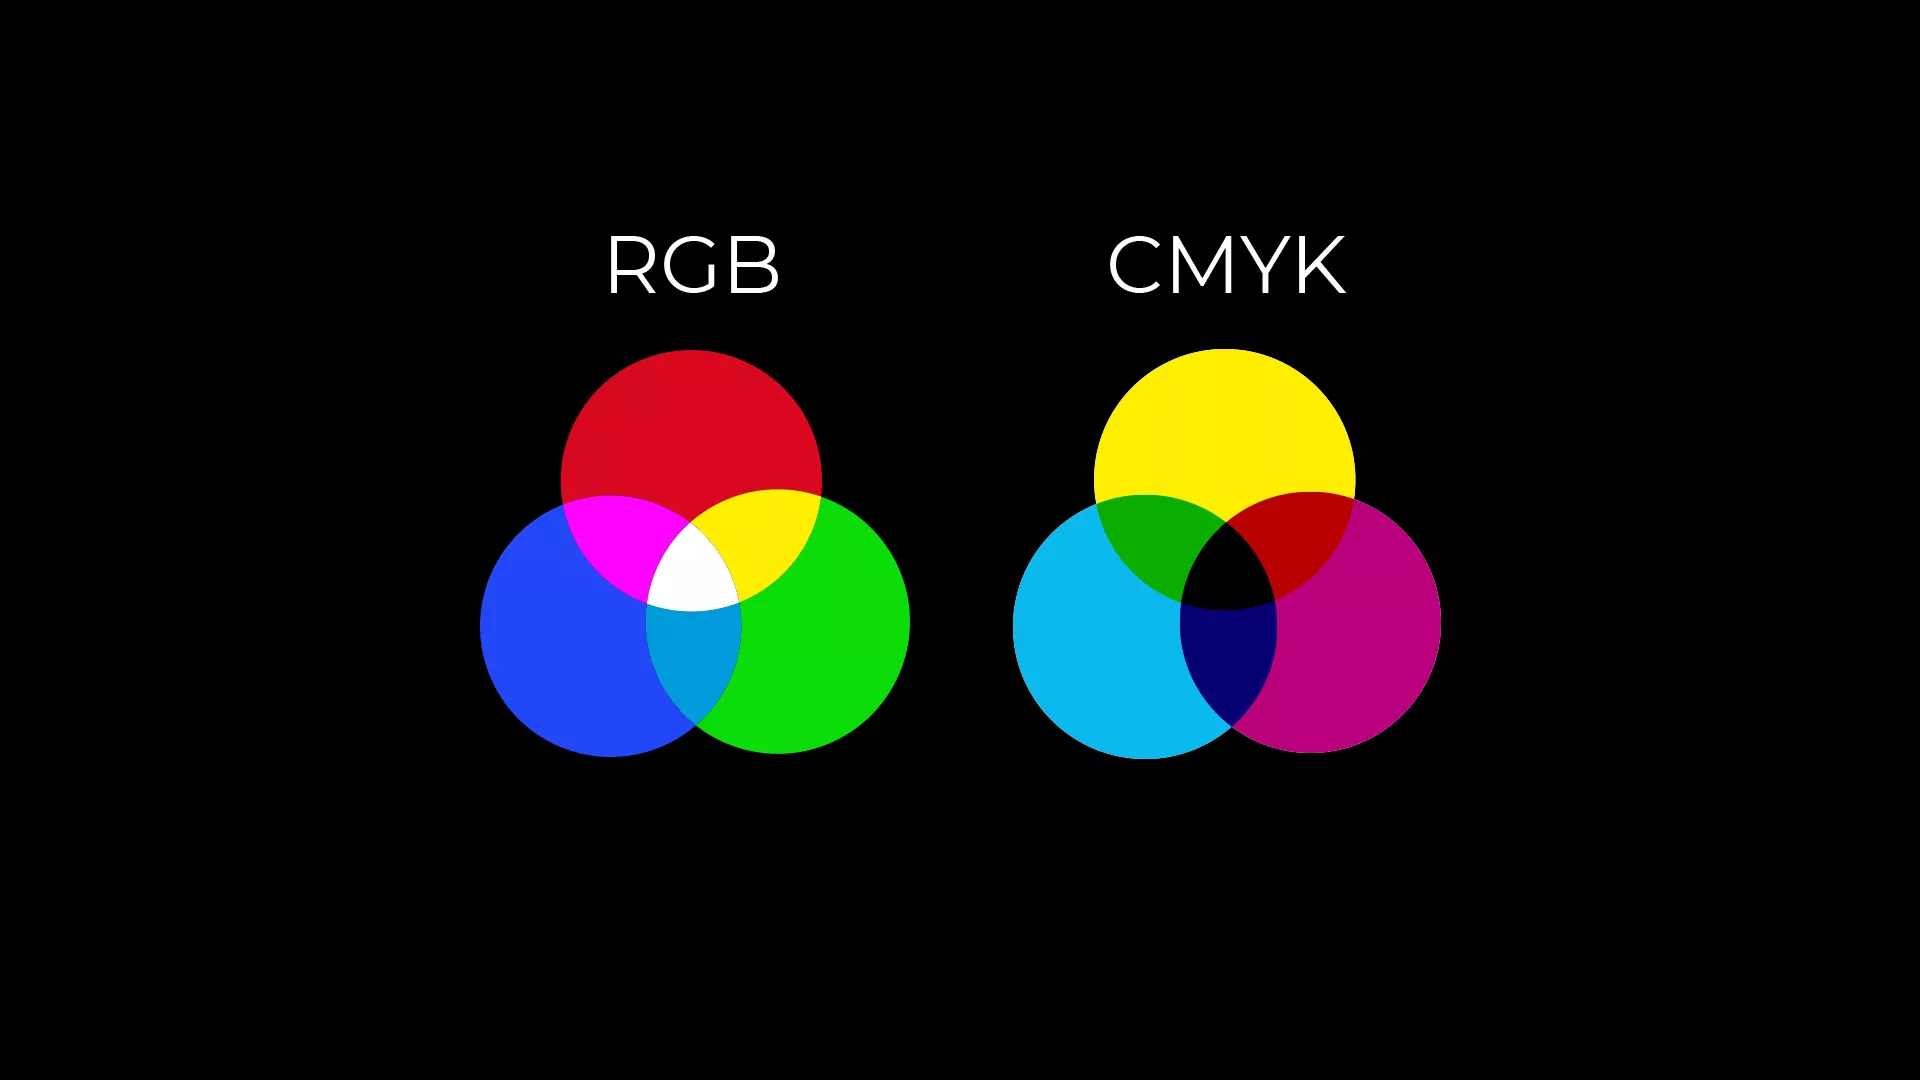

이미지를 채널별로 분리하도록 하겠습니다.

In [ ]:
channel_0 = image_np[:, :, 0]
channel_1 = image_np[:, :, 1]
channel_2 = image_np[:, :, 2]

모든 채널을 개별적으로 도식화하기 위해 subplot틀을 만들어보도록 하겠습니다.

Text(0.5, 1.0, 'Original image')

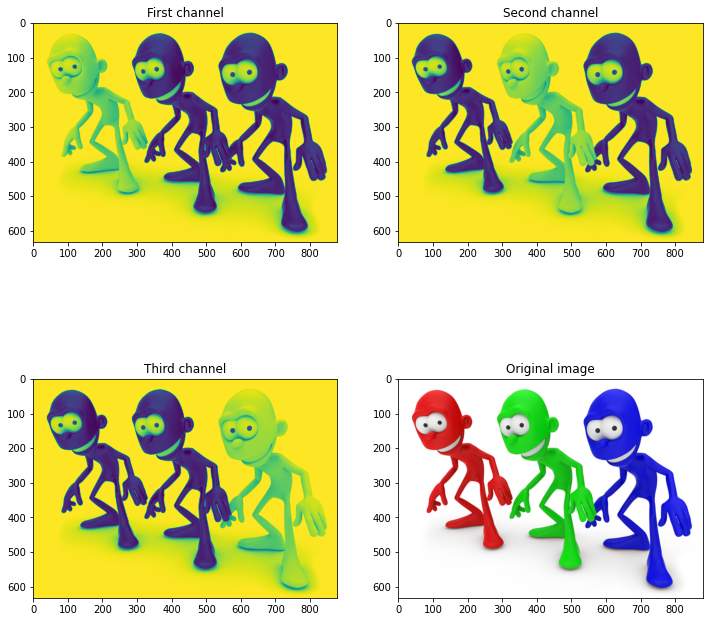

In [ ]:
figure_0, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))
ax0, ax1, ax2, ax3 = ax.flatten()

# Adjusting first subplot
ax0.imshow(channel_0)
ax0.set_xlabel('')
ax0.set_ylabel('')
ax0.set_title('First channel')

# Adjusting second subplot
ax1.imshow(channel_1)
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.set_title('Second channel')

# Adjusting third subplot
ax2.imshow(channel_2)
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.set_title('Third channel')

# Adjusting fourth subplot
ax3.imshow(image_np)
ax3.set_xlabel('')
ax3.set_ylabel('')
ax3.set_title('Original image')

## Numpy를 활용한 Convolution 연산

동일한 크기의 feature map (convolved 출력 이미지)를 얻기 위해서 그에 맞게 hyper-parameter를 설정합니다.

필터사이즈 = 3 \\
스트라이드 (슬라이딩 스텝) = 1 \\
패딩 = 1 \\

최종적으로 출력 이미지의 크기는 다음과 같습니다.

Width_Out = (Width_In - K_size + 2*Pad)/Step + 1

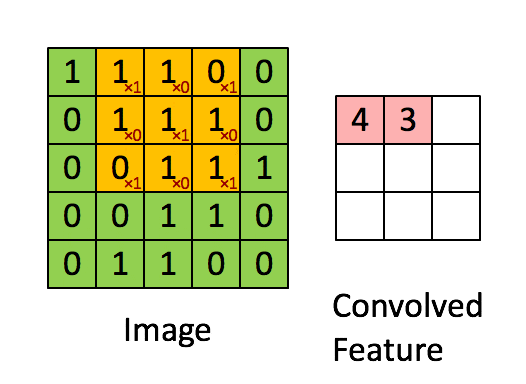

In [ ]:
# 입력 이미지의 첫번째 채널을 배열로 사용하도록 하겠습니다.
input_image = image_np[:, :, 0]
# 크기를 확인해봅니다.
print(input_image.shape)  # (633, 880)

(633, 880)


In [ ]:
# 패딩을 위해 0 값을 추가해주도록 하겠습니다. 이 때 Numpy의 pad함수를 활용하겠습니다.
input_image_with_pad = np.pad(input_image, (1, 1), mode='constant', constant_values=0)
# 크기를 확인해봅니다.
print(input_image_with_pad.shape)  # (635, 882)

(635, 882)


In [ ]:
# 3x3 'identity' 필터를 정의하겠습니다.
filter_0 = np.array([[0, 0, 0], [0, 1, 0], [0, 0, 0]])
# 크기를 확인해봅니다.
print(filter_0.shape)  # (3, 3)

(3, 3)


In [ ]:
output_image = np.zeros(input_image.shape)

# 컨볼루션 연산을 구현하겠습니다.
for i in range(input_image_with_pad.shape[0] - 2):
    for j in range(input_image_with_pad.shape[1] - 2):
        # 패드 프레임으로 입력 이미지에서 3x3패치를 추출하겠습니다.
        patch_from_input_image = input_image_with_pad[i:i+3, j:j+3]
        # 각 요소별로 곱셈 및 합산을 적용합니다 -> 이것이 convolution 연산입니다.
        output_image[i, j] = np.sum(patch_from_input_image * filter_0)

# 출력 이미지와 입력 이미지가 같은지 확인합니다.
print(np.array_equal(input_image, output_image))  # True

True


In [ ]:
print(output_image)

[[255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 ...
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]]


Text(0.5, 1.0, 'First channel -> Identity filter')

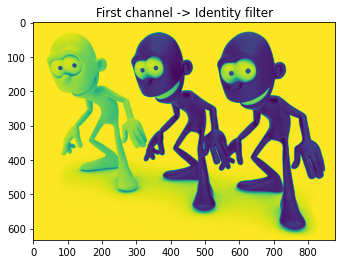

In [ ]:
plt.imshow(output_image)
plt.xlabel('')
plt.ylabel('')
plt.title('First channel -> Identity filter')

이번에는 다양한 필터를 가지고 convolution 연산을 진행해보겠습니다.

임의의 숫자로 Filter를 한번 만들어보겠습니다.

In [ ]:
filter_1 = np.array([[0, 0, 0], [0, 0, 0], [-1, -1, 1]])
filter_2 = np.array([[0, 1, 0], [1, 0, 0], [0, 1, 0]])
filter_3 = np.array([[1, -1, -1], [-1, 4, -1], [-1, -1, 1]])

print(filter_1.shape, filter_2.shape, filter_3.shape)  # (3, 3) (3, 3) (3, 3)

(3, 3) (3, 3) (3, 3)


255 이상의 값이 나타나는 것을 방지하고 이미지 픽셀의 값을 0~255 범위로 유지하기 위해 아래의 함수를 정의합니다.

In [ ]:
def values_for_image_pixels(x_array):
    result_array = np.zeros(x_array.shape)
    # 주어진 배열의 모든 요소를 통과시킵니다.
    for i in range(x_array.shape[0]):
        for j in range(x_array.shape[1]):
            # 요소가 [0, 255] 범위에 있는지 확인합니다.
            if 0 <= x_array[i, j] <= 255:
                result_array[i, j] = x_array[i, j]
            elif x_array[i, j] < 0:
                result_array[i, j] = 0
            else:
                result_array[i, j] = 255

    return result_array

In [ ]:
output_image_1 = np.zeros(input_image.shape)
output_image_2 = np.zeros(input_image.shape)
output_image_3 = np.zeros(input_image.shape)

# 아까와 똑같이 convolution연산을 진행해주도록 하겠습니다.
for i in range(input_image_with_pad.shape[0] - 2):
    for j in range(input_image_with_pad.shape[1] - 2):
        patch_from_input_image = input_image_with_pad[i:i+3, j:j+3]
        # With filter_1
        output_image_1[i, j] = np.sum(patch_from_input_image * filter_1)
        # With filter_2
        output_image_2[i, j] = np.sum(patch_from_input_image * filter_2)
        # With filter_3
        output_image_3[i, j] = np.sum(patch_from_input_image * filter_3)

# 음수 값과 255보다 큰 값을 제거하는 함수를 적용시킵니다.
output_image_1 = values_for_image_pixels(output_image_1)
output_image_2 = values_for_image_pixels(output_image_2)
output_image_3 = values_for_image_pixels(output_image_3)

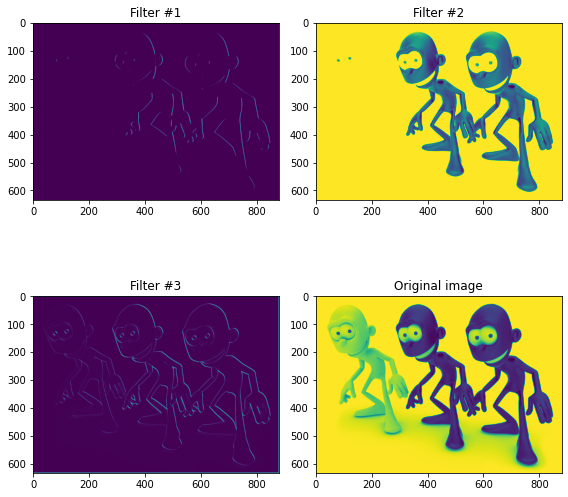

In [ ]:
figure_1, ax = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
ax0, ax1, ax2, ax3 = ax.flatten()

# Adjusting first subplot
ax0.imshow(output_image_1)
ax0.set_xlabel('')
ax0.set_ylabel('')
ax0.set_title('Filter #1')

# Adjusting second subplot
ax1.imshow(output_image_2)
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.set_title('Filter #2')

# Adjusting third subplot
ax2.imshow(output_image_3)
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.set_title('Filter #3')

# Adjusting fourth subplot
ax3.imshow(input_image)
ax3.set_xlabel('')
ax3.set_ylabel('')
ax3.set_title('Original image')

# Function to make distance between figures
plt.tight_layout()
# Showing the plots
plt.show()

## PyTorch를 활용한 Convolution 연산

### CIFAR-10 데이터셋

이미지는 비행기, 자동차(트럭이나 픽업 트럭 제외), 새, 고양이, 사슴, 개, 개구리, 말, 배, 트럭(픽업 트럭 제외)의 10가지 클래스 중 하나로 레이블이 지정됩니다.

클래스당 5000개의 훈련 이미지와 1000개의 테스트 이미지가 있는 클래스당 6000개의 이미지가 있습니다. \\
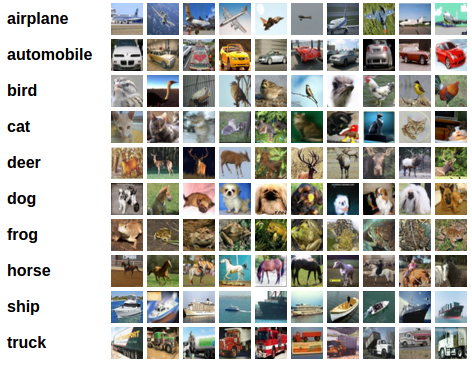

이번 실습에서 사용할 라이브러리들을 임포트하도록 하겠습니다.

PyTorch와 os에 대한 설명은 생략하도록 하겠습니다.

#### tarfile 모듈

tarfile 모듈을 사용하면 tgz, gzip, bz2 및 lzma 압축을 사용하는 것을 포함하여, tar 아카이브를 읽고 쓸 수 있습니다. 

(.zip 파일을 읽거나 쓰려면 zipfile 모듈이나 shutil에 있는 고수준 함수를 사용해야 합니다.)

In [ ]:
import os
import torch
import torchvision
import tarfile
from torchvision.datasets.utils import download_url
from torch.utils.data import random_split

데이터를 다운받도록 하겠습니다. torchvision에 있는 download_url 함수를 사용하도록 하겠습니다. 이 함수에 대한 공식문서에서의 설명은 다음과 같습니다.

"Download a file from a url and place it in root."

즉 URL만으로 데이터셋을 다운로드 받을 수 있게 해주는 함수입니다.

In [ ]:
# Dowload the dataset
dataset_url = "https://s3.amazonaws.com/fast-ai-imageclas/cifar10.tgz"
download_url(dataset_url, '.')

Using downloaded and verified file: ./cifar10.tgz


다운로드한 tgz 압축파일을 압축풀기 하도록 하겠습니다. 이를 위해 아까 임포트하였던 tarfile모듈을 사용하도록 하겠습니다.

In [ ]:
# Extract from archive
with tarfile.open('./cifar10.tgz', 'r:gz') as tar:
    tar.extractall(path='./data')

#### with문 사용 설명

with의 사용과 관련해서는 예시를 들어 설명드리도록 하겠습니다.

프로그램시 자원의 활용은

1. 자원의 획득
2. 자원의 사용
3. 자원의 반납

순으로 이어집니다.

예를 들면 다음과 같습니다.

1. 파일을 열고, (자원의 획득)
2. 안의 내용을 사용하고, (자원의 사용)
3. 파일을 닫고. (자원의 반납)


실습을 위해 임의로 txt 파일을 만들어보도록 하겠습니다.

- with문을 사용하지 않는 경우

In [ ]:
# 자원의 획득
f = open("my_text_file.txt", "w")

# 자원의 사용
text = f.write('hello')

# 자원의 반납
f.close()

- with문을 사용하는 경우

(close를 쓰지 않아도 알아서 close가 됩니다.)

In [ ]:
with open("my_text_file.txt", "w") as f:
    text = f.write('hello')

write할 때 뿐만 아니라 read 할 때에도 동일합니다.

- with문을 사용하지 않는 경우

In [ ]:
# 자원의 획득
f = open("my_text_file.txt", "r")

# 자원의 사용
text = f.read()
print(text)

# 자원의 반납
f.close()

hello


- with문을 사용하는 경우

(close를 쓰지 않아도 알아서 close가 됩니다.)

In [ ]:
with open("my_text_file.txt", "r") as f:
    text = f.read()
    print(text)

hello


데이터 세트는 data/cifar10 디렉토리로 추출됩니다. 여기에는 train 세트(50000개 이미지)와 test 세트(10000개 이미지)가 각각 포함된 train 및 test 폴더 2개가 포함되어 있습니다. 각각은 이미지의 각 클래스에 대해 하나씩 10개의 폴더를 포함합니다. os.listdir을 사용하여 이를 확인하도록 하겠습니다.

In [ ]:
data_dir = './data/cifar10'

print(os.listdir(data_dir))

['test', 'train']


In [ ]:
classes = os.listdir(data_dir + "/train")
print(classes)

['truck', 'frog', 'automobile', 'airplane', 'ship', 'cat', 'deer', 'horse', 'bird', 'dog']


두 개의 폴더 내부를 살펴보겠습니다. 하나는 훈련 세트에서, 다른 하나는 테스트 세트에서 가져옵니다. 각 클래스에 동일한 수의 이미지(트레이닝 세트에 5000개, 테스트 세트에 1000개)가 있는지 확인할 수 있습니다.

In [ ]:
airplane_files = os.listdir(data_dir + "/train/airplane")
print('No. of training examples for airplanes:', len(airplane_files))
print(airplane_files[:5])

No. of training examples for airplanes: 5000
['0972.png', '4653.png', '4296.png', '4582.png', '1084.png']


In [ ]:
ship_test_files = os.listdir(data_dir + "/test/ship")
print("No. of test examples for ship:", len(ship_test_files))
print(ship_test_files[:5])

No. of test examples for ship: 1000
['0972.png', '0254.png', '0519.png', '0999.png', '0209.png']


저는 os.listdir보다는 glob 라이브러리의 glob함수를 더 선호합니다.

In [ ]:
from glob import glob

ship_test_files = glob(data_dir + "/test/ship/*.png")
print("No. of test examples for ship:", len(ship_test_files))
print(ship_test_files[:5])

No. of test examples for ship: 1000
['./data/cifar10/test/ship/0972.png', './data/cifar10/test/ship/0254.png', './data/cifar10/test/ship/0519.png', './data/cifar10/test/ship/0999.png', './data/cifar10/test/ship/0209.png']


위의 디렉토리 구조(클래스당 하나의 폴더)는 많은 컴퓨터 비전 데이터 세트에서 사용되며 대부분의 딥러닝 라이브러리는 이러한 데이터 세트 작업을 위한 유틸리티를 제공합니다. 우리는 데이터를 PyTorch 텐서로 로드하기 위해 torchvision의 ImageFolder 클래스를 사용할 수 있습니다.

In [ ]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor

In [ ]:
dataset = ImageFolder(data_dir+'/train', transform=ToTensor())

train 데이터 세트의 요소를 살펴보겠습니다. 각 요소는 이미지 텐서와 레이블을 포함하는 튜플입니다. 데이터는 3채널(RGB)의 32x32픽셀 컬러 이미지로 구성되어 있으므로 각 이미지 텐서의 모양은 (3, 32, 32)입니다.

In [ ]:
img, label = dataset[9978]
print(img.shape, label)
print(img)

torch.Size([3, 32, 32]) 1
tensor([[[0.4353, 0.4863, 0.5961,  ..., 0.5176, 0.6000, 0.6118],
         [0.3882, 0.4549, 0.5882,  ..., 0.4471, 0.4314, 0.4235],
         [0.4353, 0.4667, 0.5922,  ..., 0.4549, 0.4549, 0.4510],
         ...,
         [0.5176, 0.5176, 0.5176,  ..., 0.3294, 0.4471, 0.4667],
         [0.5255, 0.5333, 0.5451,  ..., 0.5255, 0.5216, 0.5137],
         [0.5059, 0.5098, 0.5176,  ..., 0.5373, 0.5294, 0.5294]],

        [[0.4353, 0.4941, 0.6078,  ..., 0.5020, 0.5686, 0.5922],
         [0.3804, 0.4510, 0.5922,  ..., 0.4275, 0.4039, 0.4000],
         [0.4392, 0.4745, 0.6039,  ..., 0.4510, 0.4510, 0.4431],
         ...,
         [0.4784, 0.4784, 0.4784,  ..., 0.2980, 0.4078, 0.4275],
         [0.4824, 0.4902, 0.4980,  ..., 0.4824, 0.4745, 0.4745],
         [0.4627, 0.4706, 0.4784,  ..., 0.4941, 0.4902, 0.4902]],

        [[0.3882, 0.4745, 0.6039,  ..., 0.4745, 0.5569, 0.5686],
         [0.3451, 0.4431, 0.6000,  ..., 0.3765, 0.3686, 0.3529],
         [0.3843, 0.4510, 0.5922

matplotlib를 사용하여 이미지를 볼 수 있지만 텐서 차원을 (32,32,3)으로 변경해야 합니다.

In [ ]:
def show_example(img, label):
    print('Label: ', dataset.classes[label], "("+str(label)+")")
    # plt.imshow(img)
    plt.imshow(img.permute(1, 2, 0))

Label:  airplane (0)


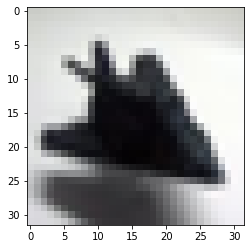

In [ ]:
show_example(*dataset[0])

Label:  automobile (1)


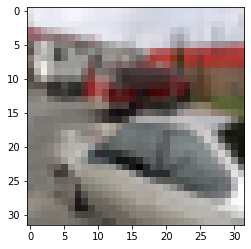

In [ ]:
show_example(*dataset[9999])

#### 가변인자 (Variadic Parameters) 사용

종종 어떤 함수에서 가변인자를 필요로 할 때가 있습니다. 예를 들어, 들어오는 인자의 갯수를 모른다거나, 그 어떤 인자라도 모두 받아서 처리를 해야하는때가 있습니다.

파이썬에서는 인자의 종류가 2가지가 있는데 하나는 positional arguments이고, 하나는 keyword arguments입니다. 전자는 말그대로 위치에 따라 정해지는 인자이며, 후자는 키워드를 가진 즉, 이름을 가진 인자를 말합니다.

variadic positional/keyword arguments를 살펴보기 전에 간단하게 positional arguments과 keyword arguments에 대해 살펴보겠습니다.

In [ ]:
# 2~4명의 주자로 이루어진 달리기 대회 랭킹을 보여주는 함수
def save_ranking(first, second, third=None, fourth=None):
    rank = {}
    rank[1], rank[2] = first, second
    rank[3] = third if third is not None else 'Nobody'
    rank[4] = fourth if fourth is not None else 'Nobody'
    print(rank)

# positional arguments 2개 전달
save_ranking('ming', 'alice')
# positional arguments 2개와 keyword argument 1개 전달
save_ranking('alice', 'ming', third='mike')
# positional arguments 2개와 keyword arguments 2개 전달 (단, 하나는 positional argument 형태로 전달)
save_ranking('alice', 'ming', 'mike', fourth='jim')

{1: 'ming', 2: 'alice', 3: 'Nobody', 4: 'Nobody'}
{1: 'alice', 2: 'ming', 3: 'mike', 4: 'Nobody'}
{1: 'alice', 2: 'ming', 3: 'mike', 4: 'jim'}


위의 함수는 first, second라는 두 개의 positional arguments를 받으며 third, fourth라는 두 개의 keyword arguments를 받고 있습니다다. positional arguments의 경우 생략이 불가능하며 갯수대로 정해진 위치에 인자를 전달해야합니다. 그러나 keyword arguments의 경우 함수 선언시 디폴트값을 설정할 수 있으며, 만약 인자를 생략할 시 해당 디폴트값이 인자의 값으로 들어갑니다. 즉, 이 형태의 인자는 생략이 가능합니다. 따라서, 여기서 알 수 있는건 keyword arguments의 경우 생략이 가능하기 때문에, positional arguments 이전에 선언될 수는 없습니다. 즉, 다음의 코드는 에러를 발생시킵니다.

In [ ]:
def save_ranking(first, second=None, third, fourth=None):
    rank = {}
    rank[1], rank[2] = first, second
    rank[3] = third if third is not None else 'Nobody'
    rank[4] = fourth if fourth is not None else 'Nobody'
    print(rank)

SyntaxError: ignored

그런데, 여기서 한 가지 문제를 맞닥뜨릴 수 있습니다. 만약, 최대 4명의 주자가 아닌 10명 또는 그 이상의 정해지지 않은 주자가 있다고 가정하겠습니다. 이 경우엔 10개의 인자를 선언하기도 번거로우며, 특히, 주자의 수가 미정일 경우 위와 같은 형태로는 처리가 불가능합니다. 이 때 사용하는게 바로 **가변인자 (Variadic Arguments)**입니다. 가변인자는 좀 전에 위에서 설명한 positional arguments와 keyword arguments에 모두 사용할 수 있으며, 사용 방법은 다음과 같습니다.

In [ ]:
# positional arguments만 받을 때
def save_ranking(*args):
    print(args)
save_ranking('ming', 'alice', 'tom', 'wilson', 'roy')

('ming', 'alice', 'tom', 'wilson', 'roy')


In [ ]:
# keyword arguments만 받을 때
def save_ranking(**kwargs):
    print(kwargs)
save_ranking(first='ming', second='alice', fourth='wilson', third='tom', fifth='roy')

{'first': 'ming', 'second': 'alice', 'fourth': 'wilson', 'third': 'tom', 'fifth': 'roy'}


### Training and Validation Datasets

실제 기계 학습 모델을 학습할 때 데이터 세트를 세 파트로 나누는 것이 일반적입니다.

* Training 세트 - 모델을 학습하는 데 사용됩니다. 즉, 경사 하강법을 사용하여 loss를 계산하고 모델의 가중치를 조정합니다.
* Validation 세트 - 훈련하는 동안 모델을 평가하고 하이퍼파라미터를 조정하여 모델의 최상의 버전을 선택하는 데 사용됩니다.
* Test 세트 - 다양한 모델 또는 다양한 유형의 접근 방식을 비교하고 모델의 최종 정확도를 보고하는 데 사용됩니다.

미리 정의된 Validation 세트가 없기 때문에 Validation 세트로 사용할 Training 세트의 일부분(5000개 을미지)을 별도로 설정하도록 하겠습니다. 이를 위해 PyTorch의 random_split을 사용합니다.

In [ ]:
val_size = 5000
train_size = len(dataset) - val_size

print(train_size)

45000


컴퓨터 프로그램에서 발생하는 무작위 수는 사실 엄격한 의미의 무작위 수가 아닙니다. 어떤 특정한 시작 숫자를 정해 주면 컴퓨터가 정해진 알고리즘에 의해 마치 난수처럼 보이는 수열을 생성합니다. 이런 시작 숫자를 시드(seed)라고 합니다. 일단 생성된 난수는 다음번 난수 생성을 위한 시드값이 됩니다. 따라서 시드값은 한 번만 정해주면 됩니다. 시드는 보통 현재 시각등을 이용하여 자동으로 정해지지만 사람이 수동으로 설정할 수도 있습니다. 특정한 시드값이 사용되면 그 다음에 만들어지는 난수들은 모두 예측할 수 있습니다.

In [ ]:
import random
import torch.backends.cudnn as cudnn

torch.manual_seed(42)
torch.cuda.manual_seed(42)
torch.cuda.manual_seed_all(42)
np.random.seed(42)
cudnn.benchmark = False
cudnn.deterministic = True
random.seed(0)

In [ ]:
val_size = 5000
train_size = len(dataset) - val_size

train_ds, val_ds = random_split(dataset, [train_size, val_size])
len(train_ds), len(val_ds)

(45000, 5000)

이제 Training 및 Validation을 위한 DataLoader를 생성하여 데이터를 배치로 로드할 수 있습니다.

- PyTorch Korea 공식문서 설명

데이터 샘플을 처리하는 코드는 지저분(messy)하고 유지보수가 어려울 수 있습니다; 더 나은 가독성(readability)과 모듈성(modularity)을 위해 데이터셋 코드를 모델 학습 코드로부터 분리하는 것이 이상적입니다. PyTorch는 torch.utils.data.DataLoader 와 torch.utils.data.Dataset 의 두 가지 데이터 기본 요소를 제공하여 미리 준비해둔(pre-loaded) 데이터셋 뿐만 아니라 가지고 있는 데이터를 사용할 수 있도록 합니다. Dataset 은 샘플과 정답(label)을 저장하고, DataLoader 는 Dataset 을 샘플에 쉽게 접근할 수 있도록 순회 가능한 객체(iterable)로 감쌉니다.

In [ ]:
from torch.utils.data.dataloader import DataLoader

batch_size=128

train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=4)
val_dl = DataLoader(val_ds, batch_size*2, num_workers=4)

/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [ ]:
for batch in train_dl:
    print(batch)
    break

/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[tensor([[[[0.5961, 0.5961, 0.5961,  ..., 0.5961, 0.5961, 0.5961],
          [0.5961, 0.5961, 0.5961,  ..., 0.5961, 0.5961, 0.5961],
          [0.5961, 0.5961, 0.5961,  ..., 0.6000, 0.5961, 0.5961],
          ...,
          [0.5333, 0.3608, 0.4275,  ..., 0.6039, 0.6000, 0.5961],
          [0.5725, 0.5294, 0.5137,  ..., 0.6039, 0.6039, 0.5961],
          [0.6000, 0.6078, 0.6039,  ..., 0.6039, 0.6000, 0.5961]],

         [[0.5961, 0.5961, 0.5961,  ..., 0.5961, 0.5961, 0.5961],
          [0.5961, 0.5961, 0.5961,  ..., 0.5961, 0.5961, 0.5961],
          [0.5961, 0.5961, 0.5961,  ..., 0.6000, 0.5961, 0.5961],
          ...,
          [0.5333, 0.3765, 0.4431,  ..., 0.6039, 0.6000, 0.5961],
          [0.5725, 0.5294, 0.5216,  ..., 0.6039, 0.6039, 0.5961],
          [0.6000, 0.6078, 0.6039,  ..., 0.6039, 0.6000, 0.5961]],

         [[0.5961, 0.5961, 0.5961,  ..., 0.5961, 0.5961, 0.5961],
          [0.5961, 0.5961, 0.5961,  ..., 0.5961, 0.5961, 0.5961],
          [0.5961, 0.5961, 0.5961,  ..., 

### Convolutional Neural Network

#### Convolution연산

이번 실습에서는 PyTorch내장의 nn.Conv2d클래스를 사용하여 Convolution network를 학습하도록 하겠습니다.

In [ ]:
from IPython.display import Image
Image(url='https://miro.medium.com/max/1070/1*Zx-ZMLKab7VOCQTxdZ1OAw.gif')

2D 컨볼루션은 본질적으로 매우 간단한 작업입니다. 단순히 가중치의 작은 행렬인 커널로 시작합니다. 이 커널은 2D 입력 데이터 위로 "슬라이드"하여 현재 있는 입력 부분과 요소별 곱셈을 수행한 다음 결과를 단일 출력 픽셀로 합산합니다.

#### Pooling 연산

Max-pooling 레이어를 사용하여 각 컨볼루션 레이어에서 출력 텐서의 높이와 너비를 점진적으로 줄입니다.

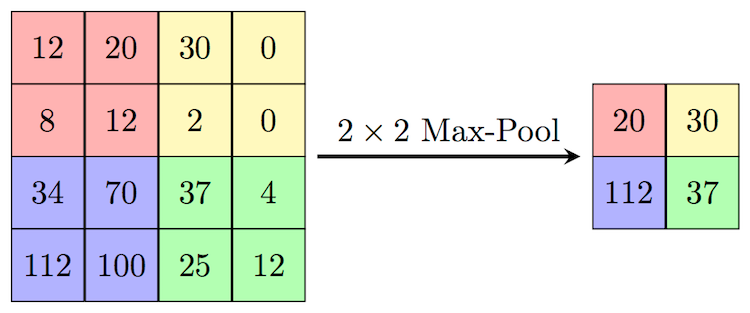

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

simple_model = nn.Sequential(
    nn.Conv2d(3, 128, kernel_size=3, stride=1, padding=1),
    nn.MaxPool2d(2, 2)
)

In [ ]:
for images, labels in train_dl:
    print('images.shape:', images.shape)
    out = simple_model(images)
    print('out.shape:', out.shape)
    break

images.shape: torch.Size([128, 3, 32, 32])
out.shape: torch.Size([128, 128, 16, 16])


Conv2d 레이어는 3채널 이미지를 16채널 feature map으로 변환하고 MaxPool2d 레이어는 높이와 너비를 줄입니다. feature map은 더 많은 레이어를 추가함에 따라 점점 작아지고 후에는 평면화(flatten)할 수 있는 작은 피처 맵이 남게 됩니다. 그다음 fully-connected 레이어를 추가하여 각 이미지에 대해 크기 10의 벡터를 얻을 수 있습니다.

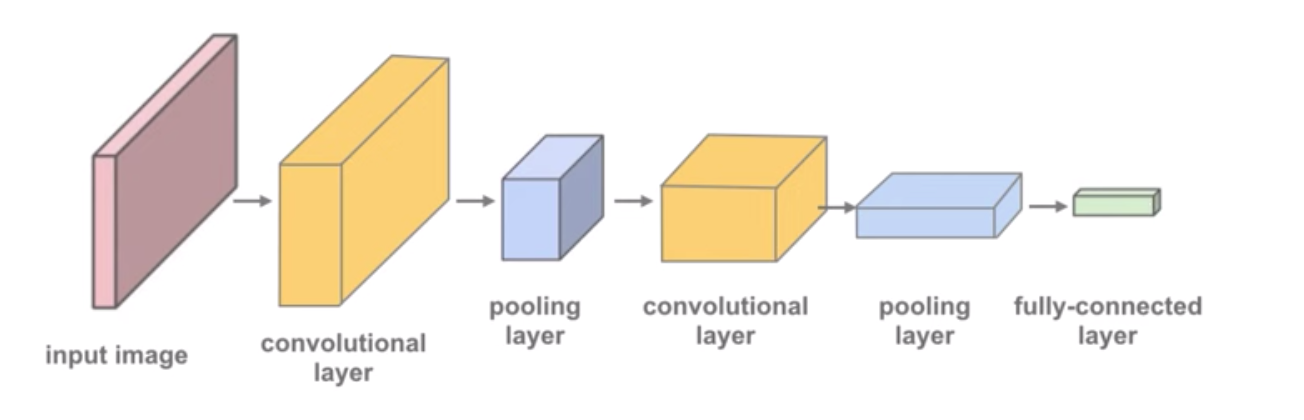

In [ ]:
class Cifar10CnnModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 64 x 16 x 16

            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 128 x 8 x 8

            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 256 x 4 x 4

            nn.Flatten(), 
            nn.Linear(256*4*4, 1024),
            nn.ReLU(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Linear(512, 10))
        
    def forward(self, xb):
        return self.network(xb)

In [ ]:
model = Cifar10CnnModel()
print(model)

Cifar10CnnModel(
  (network): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Flatten(start_dim=1, end_dim=-1)
    (16): Linear(in_features=4096, out_features=1024, bias=True)
    (17): ReLU()
    (18): Linear(in_feat

In [ ]:
# 학습에 사용할 CPU나 GPU 장치를 얻습니다.
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

print(f"Using {device} device")

Using cuda device


경사 하강법을 사용하여 모델을 훈련하고 Validation 세트에서 성능을 평가하기 위해 함수들을 정의합니다.

### Training the Model

loss함수와 optimzier를 설정해줍니다.

또한 learning rate와 같은 hyper-parameter도 설정해줍니다.

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

train 함수와 test 함수를 설정해보겠습니다.

In [ ]:
def train(dataloader, model, loss_fn, optimizer):
    loss_history_list = list()
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # 예측 오류 계산
        pred = model(X)
        loss = loss_fn(pred, y)

        # 역전파
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            loss_history_list.append(loss)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

    return loss_history_list

보통 딥러닝에서는 미니배치+루프 조합을 사용해서 parameter들을 업데이트하는데,
한 루프에서 업데이트를 위해 loss.backward()를 호출하면 각 파라미터들의 .grad 값에 변화도가 저장이 됩니다.

이후 다음 루프에서 zero_grad()를 하지않고 역전파를 시키면 이전 루프에서 .grad에 저장된 값이 다음 루프의 업데이트에도 간섭을 해서 원하는 방향으로 학습이 안되게 됩니다.

따라서 루프가 한번 돌고나서 역전파를 하기전에 반드시 zero_grad()로 .grad 값들을 0으로 초기화시킨 후 학습을 진행해야 합니다.

In [ ]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

    return test_loss, correct

* with torch.no_grad()

no_grad() with statement에 포함시키게 되면 Pytorch는 autograd engine을 꺼버립니다. 이 말은 더 이상 자동으로 gradient를 트래킹하지 않는다는 말이 됩니다. 

torch.no_grad()의 주된 목적은 autograd를 끔으로써 메모리 사용량을 줄이고 연산 속도를 높히기 위함입니다. 

* model.eval()

위의 torch.no_grad()만 쓰면 되지 않나? gradient 계산 안하고 이제 됐잖아 라고 생각할 수 있습니다. 맞는 말이지만, model.eval()의 역할은 약간 다릅니다. PyTorch에서는 모델링 시 training과 inference시에 다르게 동작하는 layer들이 존재합니다. 예를 들면, Dropout layer는 학습시에는 동작해야하지만, inference시에는 동작하지 않는 것과 같은 예시를 들 수 있습니다. BatchNorm같은 경우도 마찬가지다.

사실상 model.eval()는 이런 layer들의 동작을 inference(eval) mode로 바꿔준다는 목적으로 사용됩니다. 따라서, 우리가 보통 원하는 모델의 동작을 위해서는 위의 두 가지를 모두 사용해야하는 것이 맞습니다.

이제 본격적으로 학습을 진행하도록 하겠습니다.

In [ ]:
epochs = 10
train_loss_list, valid_loss_list, valid_acc_list = list(), list(), list()

for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loss_history_list = train(train_dl, model, loss_fn, optimizer)
    valid_loss, accuracy = test(val_dl, model, loss_fn)
    train_loss_list.extend(train_loss_history_list)
    valid_loss_list.append(valid_loss)
    valid_acc_list.append(accuracy)
print("Done!")

Epoch 1
-------------------------------
loss: 2.304268  [    0/45000]
loss: 1.917795  [12800/45000]
loss: 1.729934  [25600/45000]
loss: 1.473776  [38400/45000]
Test Error: 
 Accuracy: 46.4%, Avg loss: 1.455778 

Epoch 2
-------------------------------
loss: 1.464478  [    0/45000]
loss: 1.306089  [12800/45000]
loss: 1.223513  [25600/45000]
loss: 1.202024  [38400/45000]
Test Error: 
 Accuracy: 59.7%, Avg loss: 1.113291 

Epoch 3
-------------------------------
loss: 1.136716  [    0/45000]
loss: 1.029454  [12800/45000]
loss: 0.934109  [25600/45000]
loss: 0.753255  [38400/45000]
Test Error: 
 Accuracy: 65.9%, Avg loss: 0.942368 

Epoch 4
-------------------------------
loss: 0.795965  [    0/45000]
loss: 1.096588  [12800/45000]
loss: 0.796467  [25600/45000]
loss: 0.779796  [38400/45000]
Test Error: 
 Accuracy: 68.6%, Avg loss: 0.933418 

Epoch 5
-------------------------------
loss: 0.738007  [    0/45000]
loss: 0.543339  [12800/45000]
loss: 0.666616  [25600/45000]
loss: 0.759236  [38400

### Evaluation

우리의 모델은 약 75%의 정확도에 도달하는데, 그래프를 보면 오랜 시간 훈련을 해도 모델이 80% 이상의 정확도를 달성할 가능성은 없어 보입니다. 이는 이미지와 라벨 간의 관계를 보다 정확하게 포착하기 위해 보다 강력한 모델을 사용해야 할 수도 있음을 시사합니다. 모델에 더 많은 컨볼루션 레이어를 추가하거나 각 컨볼루션 레이어의 채널 수를 늘리거나 regularization 기술을 사용하는 등 다양한 방식을 수행해볼 수 있습니다.

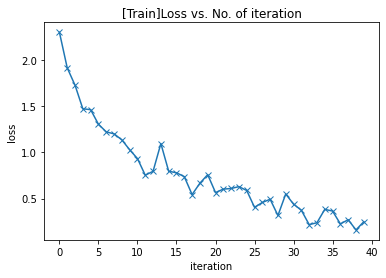

In [ ]:
def plot_loss(history):
    plt.plot(history, '-x')
    plt.xlabel('iteration')
    plt.ylabel('loss')
    plt.title('[Train]Loss vs. No. of iteration');

plot_loss(train_loss_list)

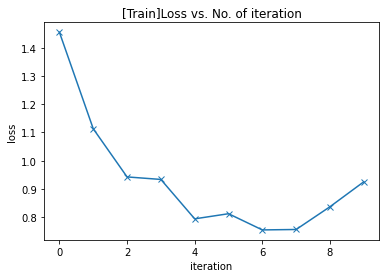

In [ ]:
plot_loss(valid_loss_list)

In [ ]:
new_train_loss_list = list()

for i,x in enumerate(train_loss_list):
    if i % 4 == 0:
        new_train_loss_list.append(x)

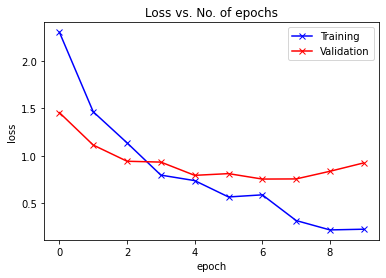

In [ ]:
def plot_losses(train_losses, val_losses):
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

plot_losses(new_train_loss_list, valid_loss_list)

처음에는 훈련 및 검증 손실이 모두 시간이 지남에 따라 감소하는 것으로 보입니다. 그러나 모델을 충분히 오래 훈련하면 훈련 손실이 계속 감소하는 반면 유효성 검사 손실은 감소를 멈추고 특정 시점 이후에는 증가하기 시작합니다.

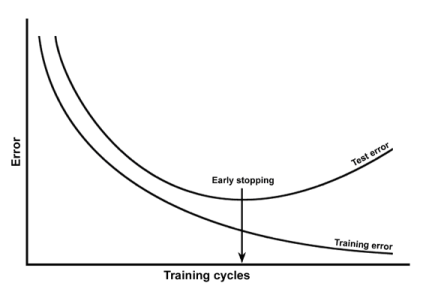

이러한 현상을 과적합이라고 하며, 많은 기계 학습 모델이 실제 데이터에 대해 좋지 않은 결과를 제공하는 대표적인 이유입니다. 모델이 손실을 최소화하기 위해 학습 데이터에 고유한 패턴을 학습하기 시작하고 때로는 특정 학습 예제를 기억하기 때문에 발생합니다. 이 때문에 모델은 이전에 본 적이 없는 데이터로 잘 일반화되지 않습니다.

다음은 과적합을 방지하기 위한 몇 가지 일반적인 전략입니다.

* 더 많은 Training 데이터를 수집 및 생성하거나 데이터에 노이즈 추가
* Batch normalization 및 Dropout과 같은 Regularization 기술 사용
* Evaluation loss가 증가하기 시작하면 모델 학습을 조기에 중지합니다.

### Testing

지금까지 모델의 전반적인 정확도를 추적했지만 일부 샘플 이미지에서 모델의 결과를 살펴보는 것도 좋은 방법입니다. 미리 정의된 10000개 이미지의 테스트 데이터 세트에서 일부 이미지로 모델을 테스트해 보겠습니다. ImageFolder 클래스를 사용하여 테스트 데이터 세트를 만드는 것으로 시작합니다.

In [ ]:
test_dataset = ImageFolder(data_dir+'/test', transform=ToTensor())

그리고 함수를 정의하여 단일 이미지 텐서에서의 확인을 용이하게 해보도록 하겠습니다.

In [ ]:
def predict_image(img, model):
    # Convert to a batch of 1
    xb = img.unsqueeze(0).to(device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    return dataset.classes[preds[0].item()]

Label: airplane , Predicted: ship


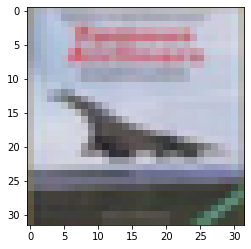

In [ ]:
img, label = test_dataset[0]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

Label: automobile , Predicted: automobile


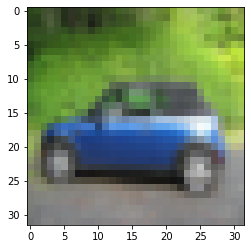

In [ ]:
img, label = test_dataset[1005]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

Label: horse , Predicted: horse


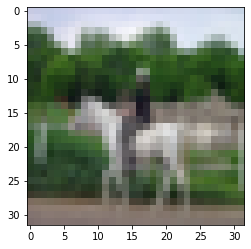

In [ ]:
img, label = test_dataset[7777]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

마지막으로 인터넷에 있는 다른 이미지를 통해서 CIFAR10 데이터뿐만 아니라 다른 데이터에서도 잘 동작하는지 살펴보겠습니다.

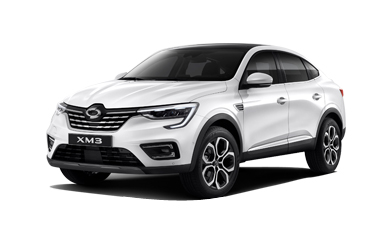

In [ ]:
from PIL import Image

# 다운받을 이미지 url
url = "https://dzqerse1lankl.cloudfront.net/carsdata/cars/cm_cardb/file/3bebfa8e-8a58-48be-9127-61751389b007.jpg"

# curl 요청
os.system("curl " + url + " > car.jpg")

# 저장 된 이미지 확인
img = Image.open("car.jpg").convert('RGB')
img

In [ ]:
import torchvision.transforms as transforms

# set up transformation to resize the image
resize = transforms.Resize([32, 32])
img = resize(img)
to_tensor = transforms.ToTensor()
tensor = to_tensor(img)

print(tensor.size())

# add another dimension at the front to get NCHW shape
img_tensor = tensor.unsqueeze(0)
print(tensor.size())

torch.Size([3, 32, 32])
torch.Size([3, 32, 32])


In [ ]:
import torchvision.transforms as transforms

# set up transformation to resize the image
resize = transforms.Resize([32, 32])
img = resize(img)
to_tensor = transforms.ToTensor()
tensor = to_tensor(img)

print(tensor.size())

# add another dimension at the front to get NCHW shape
img_tensor = tensor.unsqueeze(0)
print(tensor.size())

torch.Size([3, 32, 32])
torch.Size([3, 32, 32])


Predicted: automobile


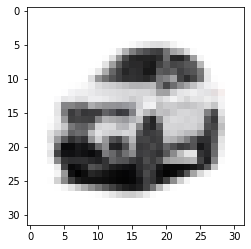

In [ ]:
plt.imshow(tensor.permute(1, 2, 0))
out = model(img_tensor.to(device))
_, preds  = torch.max(out, dim=1)
print(f'Predicted: {dataset.classes[preds[0].item()]}')